In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# downloads

In [2]:
df = pd.read_csv('invitro_train.csv')

In [3]:
df['Код теста'].unique()

array(['27Д            ', '35Д', '39Д', '36Д', '34Д'], dtype=object)

In [4]:
reg = pd.read_csv('regions_code.csv', sep=';')

In [52]:
weather = pd.read_csv('weather.csv')
weather

,Unnamed: 0,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,0,2019-02-13,-12,-19,1.4,4.8,1,60,11:57 AM,02:40 AM,...,22,100,94,1.7,1032,-12,5,207,14,Томск
1,1,2019-02-14,-9,-13,0.6,4.8,1,67,12:25 PM,03:58 AM,...,20,96,94,0.7,1032,-9,6,202,14,Томск
2,2,2019-02-15,-7,-16,0.0,9.7,2,75,01:03 PM,05:15 AM,...,24,42,92,0.0,1029,-7,9,197,14,Томск
3,3,2019-02-16,-6,-10,0.2,6.6,1,82,01:54 PM,06:26 AM,...,30,74,88,0.2,1018,-6,10,202,19,Томск
4,4,2019-02-17,-2,-6,3.9,4.9,1,90,03:02 PM,07:26 AM,...,28,100,91,4.6,1011,-2,5,200,19,Томск
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57085,57085,2021-06-22,31,16,0.0,19.8,7,87,06:18 PM,12:39 AM,...,11,20,58,0.0,1018,31,10,201,7,Сыктывкар
57086,57086,2021-06-23,33,18,0.0,19.0,6,94,08:11 PM,12:46 AM,...,10,57,72,7.4,1018,33,9,148,6,Сыктывкар
57087,57087,2021-06-24,32,19,0.0,19.0,6,100,09:51 PM,01:01 AM,...,14,46,64,3.6,1013,32,9,241,9,Сыктывкар
57088,57088,2021-06-25,31,19,0.0,19.7,7,100,10:52 PM,01:37 AM,...,16,29,62,0.7,1011,31,10,295,12,Сыктывкар


In [6]:
pokaz = pd.read_csv('regions_bc.csv')
pokaz.head(2)

,Code,region,region all,epidemic_region,activity_level_of_mite,percentage_of_mite,density,mean_wage,Ev_znmean,Biomean,anthropmea,mean
0,22,Алтайский край,68,68,9,86.1,13.67,29058,380.307289,20.897331,38.279751,2670.015970
1,28,Амурская область,28,16,6,57.1,2.16,50584,475.605941,-58.664803,54.225114,2616.829257


# replace

In [7]:
df['Region'] = df['Регион']
df['Region'] = df['Region'].apply(lambda x: x.replace('Челябинская обл ', 'Челябинская обл'))
df['Region'] = df['Region'].apply(lambda x: x.replace(' Севастополь', 'Севастополь'))
df['Region'] = df['Region'].apply(lambda x: x.replace(' Коми  Респ', 'Коми Респ'))
df['Region'] = df['Region'].apply(lambda x: x.replace(' Пермский  край', 'Пермский  край'))
df['Region'] = df['Region'].apply(lambda x: x.replace('Тюменская обл ', 'Тюменская обл'))

In [8]:
df['Дата взятия'] = pd.to_datetime(df['Дата взятия'])

In [9]:
df['Значение'].value_counts()

НЕ ОБНАР           275726
ОБНАРУЖ.            30181
ОБНАРУЖ              1872
Б/П                   674
Is not detected        40
СМ.КОММ.               35
Detected               11
СМ. КОММ                6
Name: Значение, dtype: int64

In [10]:
def clean_text(text):
    #text = text.replace(u' \xa0', u'')  # removed completely
    #text = text.replace(u'\xa0', u'')
    text = text.replace('НЕ ОБНАР', '0')
    text = text.replace('Is not detected', '0')
    
    text = text.replace('ОБНАРУЖ.', '1')
    text = text.replace('ОБНАРУЖ', '1')
    text = text.replace('Detected', '1')
    
    text = text.replace('СМ.КОММ.', '0')
    text = text.replace('СМ. КОММ', '0')
    text = text.replace('Б/П', '0')
    text = int(text)
    return text

In [11]:
df['detected'] = df['Значение'].apply(lambda x: clean_text(x))

In [12]:
df['detected'].value_counts()

0    276481
1     32064
Name: detected, dtype: int64

In [13]:
df.head(2)

,Имя теста,Код теста,Значение,Регион,Дата взятия,Region,detected
0,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-25 06:02:00,Челябинская обл,1
1,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:04:00,Челябинская обл,1


In [14]:
df['date_day'] = df['Дата взятия'].dt.round('1d')

In [15]:
df

,Имя теста,Код теста,Значение,Регион,Дата взятия,Region,detected,date_day
0,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-25 06:02:00,Челябинская обл,1,2019-05-25
1,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:04:00,Челябинская обл,1,2019-05-27
2,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:04:00,Челябинская обл,0,2019-05-27
3,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:14:00,Челябинская обл,1,2019-05-27
4,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:14:00,Челябинская обл,0,2019-05-27
...,...,...,...,...,...,...,...,...
308540,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Воронежская обл,2021-05-16 09:37:00,Воронежская обл,0,2021-05-16
308541,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,Москва,0,2021-05-16
308542,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,Москва,0,2021-05-16
308543,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-17 12:00:00,Москва,0,2021-05-17


In [16]:
train_get = pd.concat([df, pd.get_dummies(df['Имя теста'])], axis = 1)
train_get

,Имя теста,Код теста,Значение,Регион,Дата взятия,Region,detected,date_day,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК
0,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-25 06:02:00,Челябинская обл,1,2019-05-25,0,1,0,0,0
1,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:04:00,Челябинская обл,1,2019-05-27,0,1,0,0,0
2,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:04:00,Челябинская обл,0,2019-05-27,0,0,0,0,1
3,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:14:00,Челябинская обл,1,2019-05-27,0,1,0,0,0
4,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:14:00,Челябинская обл,0,2019-05-27,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308540,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Воронежская обл,2021-05-16 09:37:00,Воронежская обл,0,2021-05-16,0,0,0,0,1
308541,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,Москва,0,2021-05-16,0,1,0,0,0
308542,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,Москва,0,2021-05-16,0,0,0,0,1
308543,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-17 12:00:00,Москва,0,2021-05-17,0,1,0,0,0


# str to col

In [17]:
train_1 = train_get.groupby(['Регион','Имя теста','Region','date_day'])[['detected',
                                                                        'Anaplasma Phagocytophillum(кач) ДНК', 
           'Borrelia burgdorferi s.l (кач) ДНК', 
           'Borrelia miyamotoi (кач) ДНК',
          'Ehrlichia muris/chaffeеnsis(кач) ДНК',
          'Вирус клещевого энцефалита(кач) РНК']].agg(['sum'])

In [18]:
train_1 = train_1.reset_index()

In [264]:
train_1.head()

,Регион,Region,date_day,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,Borrelia miyamotoi (кач) ДНК positive,Ehrlichia muris/chaffeеnsis(кач) ДНК positive,Вирус клещевого энцефалита(кач) РНК positive
,,,,sum,sum,sum,sum,sum,,,,,
0,Адыгея Респ,Адыгея Респ,2019-07-30,0.0,1.0,0,0.0,0.0,0,0,0,0,0
1,Адыгея Респ,Адыгея Респ,2020-04-25,0.0,1.0,0,0.0,0.0,0,0,0,0,0
2,Адыгея Респ,Адыгея Респ,2020-05-19,0.0,2.0,0,0.0,0.0,0,0,0,0,0
3,Адыгея Респ,Адыгея Респ,2020-08-01,0.0,1.0,0,0.0,0.0,0,0,0,0,0
4,Адыгея Респ,Адыгея Респ,2021-05-11,0.0,1.0,0,0.0,0.0,0,0,0,0,0


In [20]:
train_1[train_1['Имя теста']=='Borrelia burgdorferi s.l (кач) ДНК'].count()

Регион                                       7597
Имя теста                                    7597
Region                                       7597
date_day                                     7597
detected                              sum    7597
Anaplasma Phagocytophillum(кач) ДНК   sum    7597
Borrelia burgdorferi s.l (кач) ДНК    sum    7597
Borrelia miyamotoi (кач) ДНК          sum    7597
Ehrlichia muris/chaffeеnsis(кач) ДНК  sum    7597
Вирус клещевого энцефалита(кач) РНК   sum    7597
dtype: int64

In [21]:
train_1['Borrelia burgdorferi s.l (кач) ДНК'].sum()

sum    99387.0
dtype: float64

In [24]:
columns = ['Anaplasma Phagocytophillum(кач) ДНК', 
           'Borrelia burgdorferi s.l (кач) ДНК', 
           'Borrelia miyamotoi (кач) ДНК',
          'Ehrlichia muris/chaffeеnsis(кач) ДНК',
          'Вирус клещевого энцефалита(кач) РНК']
columns_new = []
for i in columns:
    #a = columns_new.append(i+' positive')
    name = i+' positive'
    train_1[name] = 0
train_1

,Регион,Имя теста,Region,date_day,detected,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,Borrelia miyamotoi (кач) ДНК positive,Ehrlichia muris/chaffeеnsis(кач) ДНК positive,Вирус клещевого энцефалита(кач) РНК positive
,,,,,sum,sum,sum,sum,sum,sum,,,,,
0,Адыгея Респ,Borrelia burgdorferi s.l (кач) ДНК,Адыгея Респ,2019-07-30,0,0.0,1.0,0,0.0,0.0,0,0,0,0,0
1,Адыгея Респ,Borrelia burgdorferi s.l (кач) ДНК,Адыгея Респ,2020-04-25,0,0.0,1.0,0,0.0,0.0,0,0,0,0,0
2,Адыгея Респ,Borrelia burgdorferi s.l (кач) ДНК,Адыгея Респ,2020-05-19,0,0.0,2.0,0,0.0,0.0,0,0,0,0,0
3,Адыгея Респ,Borrelia burgdorferi s.l (кач) ДНК,Адыгея Респ,2020-08-01,0,0.0,1.0,0,0.0,0.0,0,0,0,0,0
4,Адыгея Респ,Borrelia burgdorferi s.l (кач) ДНК,Адыгея Респ,2021-05-11,0,0.0,1.0,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23464,Ярославская обл,Вирус клещевого энцефалита(кач) РНК,Ярославская обл,2021-05-29,0,0.0,0.0,0,0.0,2.0,0,0,0,0,0
23465,Ярославская обл,Вирус клещевого энцефалита(кач) РНК,Ярославская обл,2021-05-31,0,0.0,0.0,0,0.0,3.0,0,0,0,0,0
23466,Ярославская обл,Вирус клещевого энцефалита(кач) РНК,Ярославская обл,2021-06-03,0,0.0,0.0,0,0.0,2.0,0,0,0,0,0


In [25]:
for j in range(0, len(train_1)):
    if train_1.iloc[j,4]>0:
        for k in columns:
            if train_1.iloc[j,1] == k:
                i = k +' positive'
                train_1.loc[j,i] = train_1.iloc[j,4]

In [26]:
train_1['Borrelia burgdorferi s.l (кач) ДНК positive'].sum()

28666

In [27]:
train_1 = train_1.rename(columns = {train_1.columns[0]: "Регион", train_1.columns[1]: "Имя теста", train_1.columns[2]: "Region", train_1.columns[3]: "date_day"})

In [28]:
train_1.columns

MultiIndex([(                                       'Регион',    ''),
            (                                    'Имя теста',    ''),
            (                                       'Region',    ''),
            (                                     'date_day',    ''),
            (                                     'detected', 'sum'),
            (          'Anaplasma Phagocytophillum(кач) ДНК', 'sum'),
            (           'Borrelia burgdorferi s.l (кач) ДНК', 'sum'),
            (                 'Borrelia miyamotoi (кач) ДНК', 'sum'),
            (         'Ehrlichia muris/chaffeеnsis(кач) ДНК', 'sum'),
            (          'Вирус клещевого энцефалита(кач) РНК', 'sum'),
            ( 'Anaplasma Phagocytophillum(кач) ДНК positive',    ''),
            (  'Borrelia burgdorferi s.l (кач) ДНК positive',    ''),
            (        'Borrelia miyamotoi (кач) ДНК positive',    ''),
            ('Ehrlichia muris/chaffeеnsis(кач) ДНК positive',    ''),
            ( 'Вирус

In [29]:
train_1 = train_1.drop([train_1.columns[4],'Имя теста'], axis=1)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [30]:
train_2 = train_1.groupby(['Регион','Region','date_day']).agg(['sum',]).reset_index()

/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [31]:
train_2

,Регион,Region,date_day,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,Borrelia miyamotoi (кач) ДНК positive,Ehrlichia muris/chaffeеnsis(кач) ДНК positive,Вирус клещевого энцефалита(кач) РНК positive
,,,,sum,sum,sum,sum,sum,,,,,
,,,,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,Адыгея Респ,Адыгея Респ,2019-07-30,0.0,1.0,0,0.0,1.0,0,0,0,0,0
1,Адыгея Респ,Адыгея Респ,2020-04-25,0.0,1.0,0,0.0,1.0,0,0,0,0,0
2,Адыгея Респ,Адыгея Респ,2020-05-19,0.0,2.0,0,0.0,0.0,0,0,0,0,0
3,Адыгея Респ,Адыгея Респ,2020-08-01,0.0,1.0,0,0.0,1.0,0,0,0,0,0
4,Адыгея Респ,Адыгея Респ,2020-08-17,0.0,0.0,0,0.0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,Ярославская обл,Ярославская обл,2021-05-29,0.0,2.0,0,0.0,2.0,0,1,0,0,0
7740,Ярославская обл,Ярославская обл,2021-05-31,0.0,3.0,0,0.0,3.0,0,0,0,0,0


In [32]:
train_2.columns = ['Регион',
              'Region',
           'date_day',
            'Anaplasma Phagocytophillum(кач) ДНК',
            'Borrelia burgdorferi s.l (кач) ДНК',
            'Borrelia miyamotoi (кач) ДНК',
            'Ehrlichia muris/chaffeеnsis(кач) ДНК',
            'Вирус клещевого энцефалита(кач) РНК',
           'Anaplasma Phagocytophillum(кач) ДНК positive',
            'Borrelia burgdorferi s.l (кач) ДНК positive',
            'Borrelia miyamotoi (кач) ДНК positive',
            'Ehrlichia muris/chaffeеnsis(кач) ДНК positive',
            'Вирус клещевого энцефалита(кач) РНК positive']

In [33]:
train_2

,Регион,Region,date_day,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,Borrelia miyamotoi (кач) ДНК positive,Ehrlichia muris/chaffeеnsis(кач) ДНК positive,Вирус клещевого энцефалита(кач) РНК positive
0,Адыгея Респ,Адыгея Респ,2019-07-30,0.0,1.0,0,0.0,1.0,0,0,0,0,0
1,Адыгея Респ,Адыгея Респ,2020-04-25,0.0,1.0,0,0.0,1.0,0,0,0,0,0
2,Адыгея Респ,Адыгея Респ,2020-05-19,0.0,2.0,0,0.0,0.0,0,0,0,0,0
3,Адыгея Респ,Адыгея Респ,2020-08-01,0.0,1.0,0,0.0,1.0,0,0,0,0,0
4,Адыгея Респ,Адыгея Респ,2020-08-17,0.0,0.0,0,0.0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,Ярославская обл,Ярославская обл,2021-05-29,0.0,2.0,0,0.0,2.0,0,1,0,0,0
7740,Ярославская обл,Ярославская обл,2021-05-31,0.0,3.0,0,0.0,3.0,0,0,0,0,0
7741,Ярославская обл,Ярославская обл,2021-06-03,0.0,1.0,0,0.0,2.0,0,1,0,0,0
7742,Ярославская обл,Ярославская обл,2021-06-04,0.0,1.0,0,0.0,1.0,0,0,0,0,0


In [34]:
df

,Имя теста,Код теста,Значение,Регион,Дата взятия,Region,detected,date_day
0,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-25 06:02:00,Челябинская обл,1,2019-05-25
1,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:04:00,Челябинская обл,1,2019-05-27
2,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:04:00,Челябинская обл,0,2019-05-27
3,Borrelia burgdorferi s.l (кач) ДНК,27Д,ОБНАРУЖ.,Челябинская обл,2019-05-27 09:14:00,Челябинская обл,1,2019-05-27
4,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Челябинская обл,2019-05-27 09:14:00,Челябинская обл,0,2019-05-27
...,...,...,...,...,...,...,...,...
308540,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Воронежская обл,2021-05-16 09:37:00,Воронежская обл,0,2021-05-16
308541,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,Москва,0,2021-05-16
308542,Вирус клещевого энцефалита(кач) РНК,35Д,НЕ ОБНАР,Москва,2021-05-16 09:26:00,Москва,0,2021-05-16
308543,Borrelia burgdorferi s.l (кач) ДНК,27Д,НЕ ОБНАР,Москва,2021-05-17 12:00:00,Москва,0,2021-05-17


# merge indexes, weather

In [36]:
reg

,Наименование,Region_full,Код,Город,Широта,Долгода
0,Коми Респ,Коми республика,11.0,Сыктывкар,61.676420,50.8099400
1,Севастополь,Севастополь,92.0,Севастополь,44.616649,33.52536
2,Пермский край,Пермский край,59.0,Пермь,58.004785,56.237654
3,Челябинская обл,Челябинская область,74.0,Челябинск,55.159774,61.402455
4,Московская область,Московская областьасть,50.0,Москва,55.755773,37.617761
...,...,...,...,...,...,...
82,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_codes = train_2.merge(reg, how='left', left_on='Region',right_on='Наименование')
df_codes.head()

,Регион,Region,date_day,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,Borrelia miyamotoi (кач) ДНК positive,Ehrlichia muris/chaffeеnsis(кач) ДНК positive,Вирус клещевого энцефалита(кач) РНК positive,Наименование,Region_full,Код,Город,Широта,Долгода
0,Адыгея Респ,Адыгея Респ,2019-07-30,0.0,1.0,0,0.0,1.0,0,0,0,0,0,Адыгея Респ,Адыгея республика,1.0,Майкоп,44.60778,40.1058300
1,Адыгея Респ,Адыгея Респ,2020-04-25,0.0,1.0,0,0.0,1.0,0,0,0,0,0,Адыгея Респ,Адыгея республика,1.0,Майкоп,44.60778,40.1058300
2,Адыгея Респ,Адыгея Респ,2020-05-19,0.0,2.0,0,0.0,0.0,0,0,0,0,0,Адыгея Респ,Адыгея республика,1.0,Майкоп,44.60778,40.1058300
3,Адыгея Респ,Адыгея Респ,2020-08-01,0.0,1.0,0,0.0,1.0,0,0,0,0,0,Адыгея Респ,Адыгея республика,1.0,Майкоп,44.60778,40.1058300
4,Адыгея Респ,Адыгея Респ,2020-08-17,0.0,0.0,0,0.0,1.0,0,0,0,0,0,Адыгея Респ,Адыгея республика,1.0,Майкоп,44.60778,40.1058300


In [38]:
df_indexes = df_codes.merge(pokaz, how='left', left_on='Код',right_on='Code')

In [39]:
df_indexes = df_indexes.drop(['Наименование','Code','Широта', 'Долгода','Region_full'], axis=1)

In [40]:
df_indexes.columns

Index(['Регион', 'Region', 'date_day', 'Anaplasma Phagocytophillum(кач) ДНК',
       'Borrelia burgdorferi s.l (кач) ДНК', 'Borrelia miyamotoi (кач) ДНК',
       'Ehrlichia muris/chaffeеnsis(кач) ДНК',
       'Вирус клещевого энцефалита(кач) РНК',
       'Anaplasma Phagocytophillum(кач) ДНК positive',
       'Borrelia burgdorferi s.l (кач) ДНК positive',
       'Borrelia miyamotoi (кач) ДНК positive',
       'Ehrlichia muris/chaffeеnsis(кач) ДНК positive',
       'Вирус клещевого энцефалита(кач) РНК positive', 'Код', 'Город',
       'region', 'region all', 'epidemic_region', 'activity_level_of_mite',
       'percentage_of_mite', 'density', 'mean_wage', 'Ev_znmean', 'Biomean',
       'anthropmea', 'mean'],
      dtype='object')

In [53]:
weather['date_time'] = pd.to_datetime(weather['date_time'])

In [54]:
df_weather = pd.merge(df_indexes, weather, how='left', left_on=['date_day','Город'],right_on=['date_time', 'location'])
df_weather

,Регион,Region,date_day,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,Адыгея Респ,Адыгея Респ,2019-07-30,0.0,1.0,0,0.0,1.0,0.0,0.0,...,7,13,59,0.3,1005,34,10,222,4,Майкоп
1,Адыгея Респ,Адыгея Респ,2020-04-25,0.0,1.0,0,0.0,1.0,0.0,0.0,...,12,15,59,0.0,1009,19,10,90,8,Майкоп
2,Адыгея Респ,Адыгея Респ,2020-05-19,0.0,2.0,0,0.0,0.0,0.0,0.0,...,22,14,65,0.0,1021,21,10,264,15,Майкоп
3,Адыгея Респ,Адыгея Респ,2020-08-01,0.0,1.0,0,0.0,1.0,0.0,0.0,...,17,41,76,9.6,1006,25,9,257,10,Майкоп
4,Адыгея Респ,Адыгея Респ,2020-08-17,0.0,0.0,0,0.0,1.0,0.0,0.0,...,18,5,37,0.0,1014,28,10,74,11,Майкоп
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,Ярославская обл,Ярославская обл,2021-05-29,0.0,2.0,0,0.0,2.0,0.0,50.0,...,17,66,79,2.5,1012,16,9,174,11,Ярославль
7740,Ярославская обл,Ярославская обл,2021-05-31,0.0,3.0,0,0.0,3.0,0.0,0.0,...,18,22,58,0.0,1022,14,10,74,12,Ярославль
7741,Ярославская обл,Ярославская обл,2021-06-03,0.0,1.0,0,0.0,2.0,0.0,100.0,...,23,26,67,0.1,1028,18,10,25,15,Ярославль
7742,Ярославская обл,Ярославская обл,2021-06-04,0.0,1.0,0,0.0,1.0,0.0,0.0,...,17,2,64,0.0,1031,20,10,71,11,Ярославль


In [55]:
df[df['Имя теста']=='Borrelia burgdorferi s.l (кач) ДНК']['detected'].count()

99387

In [56]:
df_indexes['Borrelia burgdorferi s.l (кач) ДНК'].sum()

99387.0

In [57]:
print(df_weather['Borrelia burgdorferi s.l (кач) ДНК positive'].sum())
df_weather['Borrelia burgdorferi s.l (кач) ДНК'].sum()

148261.05409211313


99387.0

# графики

''

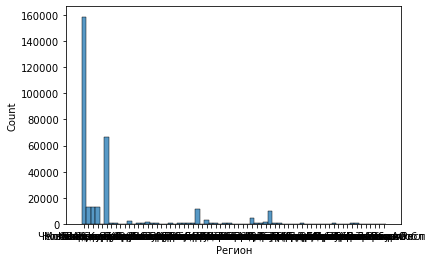

<Figure size 720x720 with 0 Axes>

In [28]:
sns.histplot(df['Регион'])
plt.figure(figsize = (10,10))
;

<Figure size 720x720 with 0 Axes>

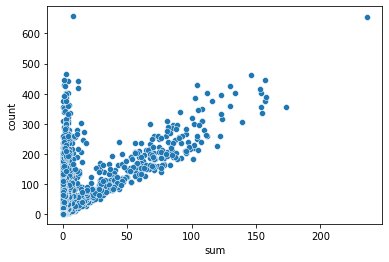

<Figure size 720x720 with 0 Axes>

In [43]:
sns.scatterplot(data = df_gr, x='sum', y='count')
plt.figure(figsize = (10,10))
#sns.scatterplot(data=tips, x="total_bill", y="tip")

<AxesSubplot:xlabel='date_day', ylabel='Count'>

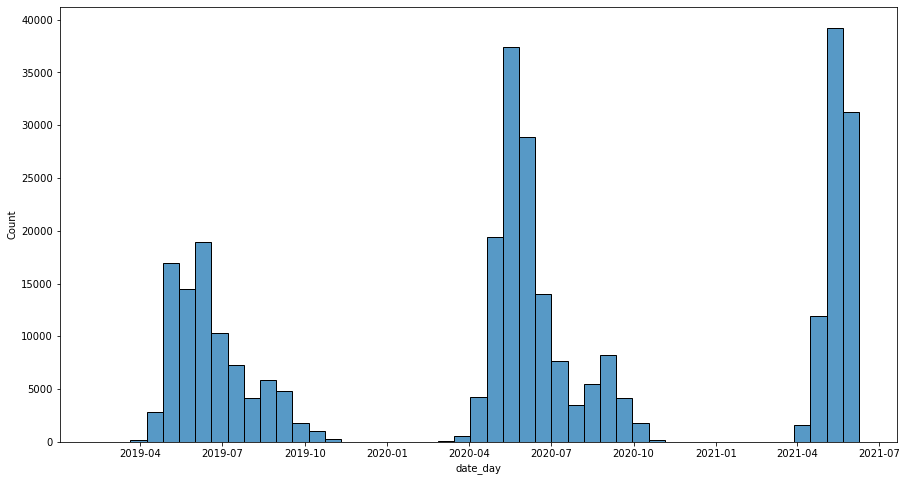

In [44]:
plt.figure(figsize = (15,8))
sns.histplot(df['date_day'])

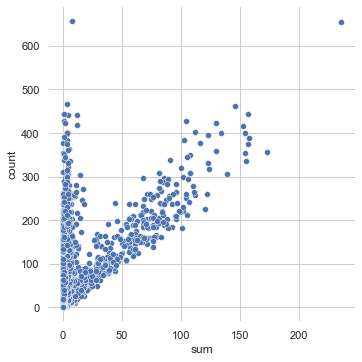

In [45]:
sns.set_theme(style="whitegrid")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

g = sns.relplot(
    data=df_gr,
    x="sum", y="count",
    #size="Регион",
    #palette=cmap, sizes=(10, 300),
)

#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [51]:
df.groupby(['Код теста', 'Имя теста'])['detected'].count()

Код теста        Имя теста                           
27Д              Borrelia burgdorferi s.l (кач) ДНК      99387
34Д              Anaplasma Phagocytophillum(кач) ДНК     44427
35Д              Вирус клещевого энцефалита(кач) РНК     99695
36Д              Borrelia miyamotoi (кач) ДНК            20615
39Д              Ehrlichia muris/chaffeеnsis(кач) ДНК    44421
Name: detected, dtype: int64

In [52]:
df_type_test = df.groupby(['Код теста','Имя теста'])['detected'].agg(['sum', 'count'])
df_type_test['%of_all_test_done'] = round(df_type_test['count']/df_type_test['count'].sum()*100)
df_type_test['%of_of_all_detected'] = round(df_type_test['sum']/df_type_test['sum'].sum()*100)
df_type_test['detected/done'] = round(df_type_test['sum']/df_type_test['count']*100)
df_type_test

,,sum,count,%of_all_test_done,%of_of_all_detected,detected/done
Код теста,Имя теста,,,,,
27Д,Borrelia burgdorferi s.l (кач) ДНК,28666,99387,32.0,89.0,29.0
34Д,Anaplasma Phagocytophillum(кач) ДНК,605,44427,14.0,2.0,1.0
35Д,Вирус клещевого энцефалита(кач) РНК,660,99695,32.0,2.0,1.0
36Д,Borrelia miyamotoi (кач) ДНК,874,20615,7.0,3.0,4.0
39Д,Ehrlichia muris/chaffeеnsis(кач) ДНК,1259,44421,14.0,4.0,3.0


In [54]:
df.to_csv('preprocessed_df.csv', index=False)

In [53]:
df_gr.to_csv('preprocessed_df_gr.csv', index=False)

# final csv

In [58]:
df_weather.head()

,Регион,Region,date_day,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,Адыгея Респ,Адыгея Респ,2019-07-30,0.0,1.0,0,0.0,1.0,0.0,0.0,...,7,13,59,0.3,1005,34,10,222,4,Майкоп
1,Адыгея Респ,Адыгея Респ,2020-04-25,0.0,1.0,0,0.0,1.0,0.0,0.0,...,12,15,59,0.0,1009,19,10,90,8,Майкоп
2,Адыгея Респ,Адыгея Респ,2020-05-19,0.0,2.0,0,0.0,0.0,0.0,0.0,...,22,14,65,0.0,1021,21,10,264,15,Майкоп
3,Адыгея Респ,Адыгея Респ,2020-08-01,0.0,1.0,0,0.0,1.0,0.0,0.0,...,17,41,76,9.6,1006,25,9,257,10,Майкоп
4,Адыгея Респ,Адыгея Респ,2020-08-17,0.0,0.0,0,0.0,1.0,0.0,0.0,...,18,5,37,0.0,1014,28,10,74,11,Майкоп


In [59]:
col = ['Anaplasma Phagocytophillum(кач) ДНК',
            'Borrelia burgdorferi s.l (кач) ДНК',
            'Borrelia miyamotoi (кач) ДНК',
            'Ehrlichia muris/chaffeеnsis(кач) ДНК',
            'Вирус клещевого энцефалита(кач) РНК']
           
col2 = ['Anaplasma Phagocytophillum(кач) ДНК positive',
            'Borrelia burgdorferi s.l (кач) ДНК positive',
            'Borrelia miyamotoi (кач) ДНК positive',
            'Ehrlichia muris/chaffeеnsis(кач) ДНК positive',
            'Вирус клещевого энцефалита(кач) РНК positive']

In [60]:
for i in range(5): 
    df_indexes[col2[i]] = df_indexes[col2[i]]/df_indexes[col[i]]*100
    df_indexes[col2[i]] = df_indexes[col2[i]].fillna(0)

In [61]:
df_weather['Mnth'] = df_weather['date_day'].dt.month
df_weather['Day'] = df_weather['date_day'].dt.day

In [62]:
df_weather['Borrelia miyamotoi (кач) ДНК'] = df_weather['Borrelia miyamotoi (кач) ДНК'].astype(int)

In [64]:
map_reg = {}
k=0
for i in df_weather['Регион'].unique():
    map_reg[i] = k
    k+=1

In [65]:
df_weather['region_code'] = df_weather['Регион'].map(map_reg)

In [267]:
df_weather.head()

,Регион,Region,date_day,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,...,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,Mnth,Day,region_code
0,Адыгея Респ,Адыгея Респ,2019-07-30,0.0,1.0,0,0.0,1.0,0.0,0.0,...,0.3,1005,34,10,222,4,Майкоп,7,30,0
1,Адыгея Респ,Адыгея Респ,2020-04-25,0.0,1.0,0,0.0,1.0,0.0,0.0,...,0.0,1009,19,10,90,8,Майкоп,4,25,0
2,Адыгея Респ,Адыгея Респ,2020-05-19,0.0,2.0,0,0.0,0.0,0.0,0.0,...,0.0,1021,21,10,264,15,Майкоп,5,19,0
3,Адыгея Респ,Адыгея Респ,2020-08-01,0.0,1.0,0,0.0,1.0,0.0,0.0,...,9.6,1006,25,9,257,10,Майкоп,8,1,0
4,Адыгея Респ,Адыгея Респ,2020-08-17,0.0,0.0,0,0.0,1.0,0.0,0.0,...,0.0,1014,28,10,74,11,Майкоп,8,17,0


In [74]:
final_train = df_weather.drop(['Регион','Region', 'date_day','Код','Город','region', 'Unnamed: 0', 'location'], axis=1)
final_train

,Регион,Anaplasma Phagocytophillum(кач) ДНК,Borrelia burgdorferi s.l (кач) ДНК,Borrelia miyamotoi (кач) ДНК,Ehrlichia muris/chaffeеnsis(кач) ДНК,Вирус клещевого энцефалита(кач) РНК,Anaplasma Phagocytophillum(кач) ДНК positive,Borrelia burgdorferi s.l (кач) ДНК positive,Borrelia miyamotoi (кач) ДНК positive,Ehrlichia muris/chaffeеnsis(кач) ДНК positive,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,Mnth,Day,region_code
0,Адыгея Респ,0.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,59,0.3,1005,34,10,222,4,7,30,0
1,Адыгея Респ,0.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,59,0.0,1009,19,10,90,8,4,25,0
2,Адыгея Респ,0.0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,65,0.0,1021,21,10,264,15,5,19,0
3,Адыгея Респ,0.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,76,9.6,1006,25,9,257,10,8,1,0
4,Адыгея Респ,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,37,0.0,1014,28,10,74,11,8,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,Ярославская обл,0.0,2.0,0,0.0,2.0,0.0,50.0,0.0,0.0,...,79,2.5,1012,16,9,174,11,5,29,66
7740,Ярославская обл,0.0,3.0,0,0.0,3.0,0.0,0.0,0.0,0.0,...,58,0.0,1022,14,10,74,12,5,31,66
7741,Ярославская обл,0.0,1.0,0,0.0,2.0,0.0,100.0,0.0,0.0,...,67,0.1,1028,18,10,25,15,6,3,66
7742,Ярославская обл,0.0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,...,64,0.0,1031,20,10,71,11,6,4,66


In [75]:
final_train[final_train['maxtempC'].isnull()]['region_code'].value_counts()

Series([], Name: region_code, dtype: int64)

In [83]:
weather['location'].unique()

array(['Томск', 'Хабаровск', 'Пермь', 'Белгород', 'Кострома', 'Махачкала',
       'Липецк', 'Брянск', 'Севастополь', 'Саранск', 'Новосибирск',
       'Барнаул', 'Горно-Алтайск', 'Ростов-на-Дону', 'Ульяновск',
       'Самара', 'Курган', 'Майкоп', 'Москва', 'Калуга', 'Нальчик',
       'Санкт-Петербург', 'Тверь', 'Ижевск', 'Оренбург', 'Кызыл',
       'Калининград', 'Рязань', 'Тула', 'Саратов', 'Иркутск', 'Чебоксары',
       'Омск', 'Волгоград', 'Краснодар', 'Тюмень', 'Ставрополь',
       'Астрахань', 'Ярославль', 'Киров', 'Орел', 'Казань', 'Симферополь',
       'Воронеж', 'Биробиджан', 'Ханты-Мансийск', 'Кемерово',
       'Владикавказ', 'Владимир', 'Салехард', 'Абакан', 'Нижний Новгород',
       'Челябинск', 'Пенза', 'Грозный', 'Екатеринбург', 'Иваново',
       'Владивосток', 'Тамбов', 'Курск', 'Южно-Сахалинск', 'Смоленск',
       'Уфа', 'Чита', 'Красноярск', 'Сыктывкар'], dtype=object)

In [84]:
final_train.to_csv('final_train.csv', index=False)

In [85]:
final_train.columns

Index(['Регион', 'Anaplasma Phagocytophillum(кач) ДНК',
       'Borrelia burgdorferi s.l (кач) ДНК', 'Borrelia miyamotoi (кач) ДНК',
       'Ehrlichia muris/chaffeеnsis(кач) ДНК',
       'Вирус клещевого энцефалита(кач) РНК',
       'Anaplasma Phagocytophillum(кач) ДНК positive',
       'Borrelia burgdorferi s.l (кач) ДНК positive',
       'Borrelia miyamotoi (кач) ДНК positive',
       'Ehrlichia muris/chaffeеnsis(кач) ДНК positive',
       'Вирус клещевого энцефалита(кач) РНК positive', 'region all',
       'epidemic_region', 'activity_level_of_mite', 'percentage_of_mite',
       'density', 'mean_wage', 'Ev_znmean', 'Biomean', 'anthropmea', 'mean',
       'date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'wind

In [86]:
y = final_train[['Anaplasma Phagocytophillum(кач) ДНК',
       'Borrelia burgdorferi s.l (кач) ДНК', 'Borrelia miyamotoi (кач) ДНК',
       'Ehrlichia muris/chaffeеnsis(кач) ДНК',
       'Вирус клещевого энцефалита(кач) РНК',
       'Anaplasma Phagocytophillum(кач) ДНК positive',
       'Borrelia burgdorferi s.l (кач) ДНК positive',
       'Borrelia miyamotoi (кач) ДНК positive',
       'Ehrlichia muris/chaffeеnsis(кач) ДНК positive',
       'Вирус клещевого энцефалита(кач) РНК positive']]

In [111]:
x = final_train[['region all',
       'epidemic_region', 'activity_level_of_mite', 'percentage_of_mite',
       'density', 'mean_wage', 'Ev_znmean', 'Biomean', 'anthropmea', 'mean',
        'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination',
        'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'Mnth', 'Day',
       'region_code']]

In [112]:
x = pd.concat([x, pd.get_dummies(x['region_code']).astype('int')], axis = 1)
x

,region all,epidemic_region,activity_level_of_mite,percentage_of_mite,density,mean_wage,Ev_znmean,Biomean,anthropmea,mean,...,57,58,59,60,61,62,63,64,65,66
0,0,0,1,10.0,59.44,30991,647.998040,89.213187,38.071429,2969.252747,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,10.0,59.44,30991,647.998040,89.213187,38.071429,2969.252747,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,10.0,59.44,30991,647.998040,89.213187,38.071429,2969.252747,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.0,59.44,30991,647.998040,89.213187,38.071429,2969.252747,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,10.0,59.44,30991,647.998040,89.213187,38.071429,2969.252747,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,23,18,8,78.2,34.32,37008,462.644381,36.254507,39.787149,2695.825855,...,0,0,0,0,0,0,0,0,0,1
7740,23,18,8,78.2,34.32,37008,462.644381,36.254507,39.787149,2695.825855,...,0,0,0,0,0,0,0,0,0,1
7741,23,18,8,78.2,34.32,37008,462.644381,36.254507,39.787149,2695.825855,...,0,0,0,0,0,0,0,0,0,1
7742,23,18,8,78.2,34.32,37008,462.644381,36.254507,39.787149,2695.825855,...,0,0,0,0,0,0,0,0,0,1


In [113]:
x = x.drop('region_code', axis=1)

# model

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6195, 98), (1549, 98), (6195, 10), (1549, 10))

In [117]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error

In [118]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [119]:
rgr = MultiOutputRegressor(LinearSVR(loss='squared_epsilon_insensitive', max_iter = 5000)).fit(X_train_norm, y_train)

#SVR = LinearSVR(loss='squared_epsilon_insensitive')
#SVR.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/homebre

In [120]:
X_test_norm = scaler.transform(X_test)

In [121]:
rgr.predict(X_test_norm)

array([[ 2.14312046e+00,  1.15087501e+01, -1.47662177e-01, ...,
         8.61754251e-01,  1.34298503e+00,  2.55510418e-01],
       [ 1.30471053e+00,  2.65200216e+00,  4.87703091e-01, ...,
         2.86555253e-01, -3.58713183e-01, -7.90513654e-02],
       [ 4.20371516e+00,  9.16283622e+00,  2.18458466e+00, ...,
         5.97295760e-01,  7.75268562e-02, -2.39211803e-02],
       ...,
       [-2.67460439e+00,  1.61076278e+00, -1.14912798e+00, ...,
         1.84473995e+00,  1.64207775e+00,  4.28816169e-01],
       [ 1.11442591e+00,  1.60164687e+00,  5.99832726e-01, ...,
        -3.62304435e-01, -2.64140056e-01, -1.50714956e-01],
       [ 4.67636613e+01,  7.07941863e+01,  1.57115278e+01, ...,
         1.10820709e+00,  2.60520645e-01,  2.43710161e-01]])

In [122]:
mean_absolute_error(rgr.predict(X_test_norm), y_test)

6.990464809601582

# scaler and fit on all test

In [123]:
scaler_new = StandardScaler()
all_x_norm = scaler_new.fit_transform(x)

In [124]:
rgr = MultiOutputRegressor(LinearSVR(loss='squared_epsilon_insensitive', max_iter = 5000)).fit(all_x_norm, y)

/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/homebrew/Caskroom/miniforge/base/envs/tf_env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/homebre

# predict

In [224]:
    test_names = sorted(df['Имя теста'].unique())
    test_names_count = [f'{t} count' for t in test_names]
    test_names_pos_perc = [f'{t} pos perc' for t in test_names]
    regions = sorted(df['Регион'].unique())
    date = pd.date_range('2021.06.09', '2021.06.26', freq='1d')
    
    test_test = pd.DataFrame()
    
for region in regions:
     df_reg_test = pd.DataFrame(index=date)
     df_reg_test['date'] = pd.to_datetime(df_reg_test.index)
     df_reg_test['Регион'] = region # !! fixed region order
     df_reg_test['region_code'] = df_reg_test['Регион'].map(map_reg)
     df_reg_test['Mnth'] = df_reg_test['date'].dt.month
     df_reg_test['Day'] = df_reg_test['date'].dt.day
    
     #test_test.append(df_reg_test)
     test_test = pd.concat([test_test, df_reg_test], axis=0)

In [217]:
test_test.head()

,date,Регион,region_code,Mnth,Day
2021-06-09,2021-06-09,Адыгея Респ,0,6,9
2021-06-10,2021-06-10,Адыгея Респ,0,6,10
2021-06-11,2021-06-11,Адыгея Респ,0,6,11
2021-06-12,2021-06-12,Адыгея Респ,0,6,12
2021-06-13,2021-06-13,Адыгея Респ,0,6,13


# last_day

In [225]:
    test_names = sorted(df['Имя теста'].unique())
    test_names_count = [f'{t} count' for t in test_names]
    test_names_pos_perc = [f'{t} pos perc' for t in test_names]
    regions = sorted(df['Регион'].unique())
    date_one = pd.date_range('2021.06.27', '2021.06.27', freq='1d')
    
    test_test_one = pd.DataFrame()
    
for region in regions:
     df_reg_test = pd.DataFrame(index=date_one)
     df_reg_test['date'] = pd.to_datetime(df_reg_test.index)
     df_reg_test['Регион'] = region # !! fixed region order
     df_reg_test['region_code'] = df_reg_test['Регион'].map(map_reg)
     df_reg_test['Mnth'] = df_reg_test['date'].dt.month
     df_reg_test['Day'] = df_reg_test['date'].dt.day
    
     #test_test.append(df_reg_test)
     test_test_one  = pd.concat([test_test_one, df_reg_test], axis=0)

In [228]:
test_test_one['date'] = '2021.06.26'
test_test_one['date'] = pd.to_datetime(test_test_one['date'])

In [230]:
test_test_one['Region'] = test_test_one['Регион']
test_test_one['Region'] = test_test_one['Region'].apply(lambda x: x.replace('Челябинская обл ', 'Челябинская обл'))
test_test_one['Region'] = test_test_one['Region'].apply(lambda x: x.replace(' Севастополь', 'Севастополь'))
test_test_one['Region'] = test_test_one['Region'].apply(lambda x: x.replace(' Коми  Респ', 'Коми Респ'))
test_test_one['Region'] = test_test_one['Region'].apply(lambda x: x.replace(' Пермский  край', 'Пермский  край'))
test_test_one['Region'] = test_test_one['Region'].apply(lambda x: x.replace('Тюменская обл ', 'Тюменская обл'))

In [231]:
test_test_one = test_test_one.merge(reg, how='left', left_on='Region',right_on='Наименование')
test_test_one = test_test_one.merge(pokaz, how='left', left_on='Код',right_on='Code')
test_test_one = test_test_one.merge(weather, how='left', left_on=['date','Город'],right_on=['date_time','location'])

In [266]:
test_test_one.head()

,date,Регион,region_code,Mnth,Day,Region,Наименование,Region_full,Код,Город,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2021-06-27,Адыгея Респ,0,6,27,Адыгея Респ,Адыгея Респ,Адыгея республика,1.0,Майкоп,...,12,38,78,0.2,1011,29,8,266,8,Майкоп
1,2021-06-27,Алтай Респ,1,6,27,Алтай Респ,Алтай Респ,Алтай республика,4.0,Горно-Алтайск,...,7,89,86,8.1,1014,16,8,211,4,Горно-Алтайск
2,2021-06-27,Алтайский край,2,6,27,Алтайский край,Алтайский край,Алтайский край,22.0,Барнаул,...,8,48,72,1.2,1014,19,10,211,5,Барнаул
3,2021-06-27,Астраханская обл,3,6,27,Астраханская обл,Астраханская обл,Астраханская область,30.0,Астрахань,...,26,27,25,0.0,1009,39,10,116,18,Астрахань
4,2021-06-27,Башкортостан Респ,4,6,27,Башкортостан Респ,Башкортостан Респ,Башкортостан республика,2.0,Уфа,...,15,44,70,5.1,1011,31,10,309,10,Уфа


In [233]:
test_test_one['date'] = '2021.06.27'
test_test_one['date'] = pd.to_datetime(test_test_one['date'])

# concate

In [234]:
test_test['Region'] = test_test['Регион']
test_test['Region'] = test_test['Region'].apply(lambda x: x.replace('Челябинская обл ', 'Челябинская обл'))
test_test['Region'] = test_test['Region'].apply(lambda x: x.replace(' Севастополь', 'Севастополь'))
test_test['Region'] = test_test['Region'].apply(lambda x: x.replace(' Коми  Респ', 'Коми Респ'))
test_test['Region'] = test_test['Region'].apply(lambda x: x.replace(' Пермский  край', 'Пермский  край'))
test_test['Region'] = test_test['Region'].apply(lambda x: x.replace('Тюменская обл ', 'Тюменская обл'))

In [235]:
test_test = test_test.merge(reg, how='left', left_on='Region',right_on='Наименование')
test_test = test_test.merge(pokaz, how='left', left_on='Код',right_on='Code')
test_test = test_test.merge(weather, how='left', left_on=['date','Город'],right_on=['date_time','location'])

In [236]:
test_test = pd.concat([test_test, test_test_one ], axis = 0)

In [265]:
test_test.head()

,date,Регион,region_code,Mnth,Day,region all,epidemic_region,activity_level_of_mite,percentage_of_mite,density,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2021-06-09,Адыгея Респ,0,6,9,0,0,1,10.0,59.44,...,18,10,7,66,0.0,1012,25,10,179,6
1,2021-06-10,Адыгея Респ,0,6,10,0,0,1,10.0,59.44,...,19,9,37,68,0.2,1012,24,10,224,6
2,2021-06-11,Адыгея Респ,0,6,11,0,0,1,10.0,59.44,...,19,9,41,77,4.1,1012,25,10,167,5
3,2021-06-12,Адыгея Респ,0,6,12,0,0,1,10.0,59.44,...,20,9,42,79,4.9,1013,26,10,99,6
4,2021-06-13,Адыгея Респ,0,6,13,0,0,1,10.0,59.44,...,20,10,47,83,7.2,1012,24,9,262,6


In [238]:
test_test = test_test.drop(['Наименование','Code','Широта','region', 'Долгода','Region_full','Город','Код', 'Region','Unnamed: 0', 'location'], axis=1)

In [258]:
test_test.shape

(1273, 39)

In [250]:
test_test.to_csv('test_test.csv', index=False)

In [252]:
x_test_test = test_test[['region all',
       'epidemic_region', 'activity_level_of_mite', 'percentage_of_mite',
       'density', 'mean_wage', 'Ev_znmean', 'Biomean', 'anthropmea', 'mean',
        'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination',
        'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'Mnth', 'Day',
       'region_code']]

In [253]:
x_test_test = pd.concat([x_test_test, pd.get_dummies(x_test_test['region_code']).astype('int')], axis = 1)

In [254]:
x_test_test = x_test_test.drop('region_code', axis=1)

In [256]:
x_test_test_norm = scaler_new.transform(x_test_test)

In [257]:
x_test_test_norm.shape

(1273, 98)

In [245]:
pred = rgr.predict(x_test_test_norm)

In [263]:
np.save('pred_svr.npy', pred)